In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print ("Data is loaded!")
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Data is loaded!
Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


### EDA

>There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

In [3]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice') # the price we want to get 
quantitative.remove('Id') # drop it not information
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

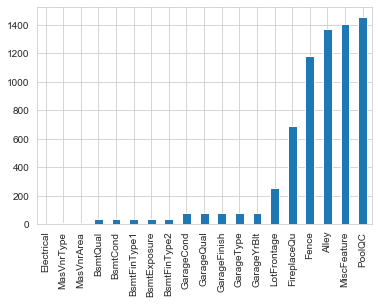

In [4]:
sns.set_style("whitegrid")
missing = train.isnull().sum() # getting how mant data points have missing value
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

>19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

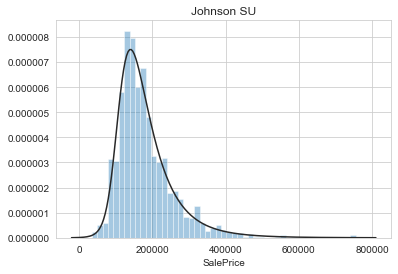

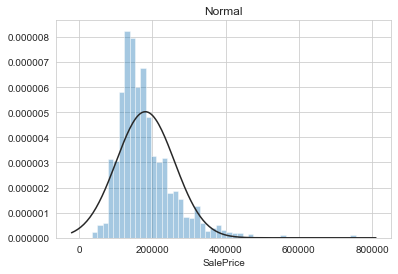

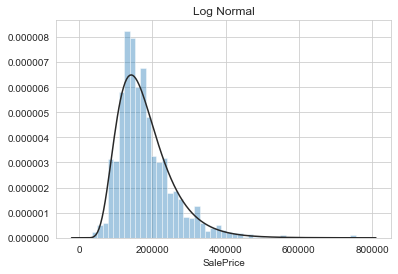

In [5]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

Based on a lot of research,it is apparent that SalePrice doesn't follow **normal distribution**.
So we have to transform the data into another distribution and mathmatically using logrithm or other transformation way in statistic!


### Getting the corellation bewteen features and target(Price)


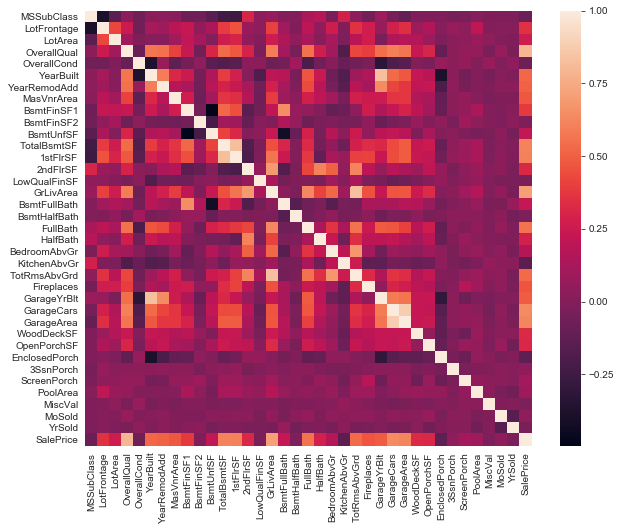

In [6]:
plt.figure(figsize=(10,8))
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
## For the categorical data we can apply some algrithm like random forest to pick the top K features.


## With the brighten color we have the feature is more important in the prediction.